# Group 8 Assessment
| Group             | 8                        |
| :----------------: | :------------------------: |
| Level             | 7(Postgraduate)          |
| Course Name       | MSc Business Analytics   |
| Module code       | MN5813                  |
| Module tutor      | Alex Reppel              |
| Assignment number | 1 (Group assignment)     |
| Assignment title  | Olympic Athlete Data     |

| Group             | 
| :----------------: |
| 2510408| MN5813   !
| 2502850| MN5813   !
|     2504189   | 


### LINK FOR JUPYTER NOTEBOOK : 

## Project Summary

For this project, we analyzed the “120 years of Olympic history: athletes and results” dataset, which is publicly available on Kaggle. This dataset contains detailed information about Olympic athletes and their performances from the inaugural Athens 1896 Games to the Rio 2016 Games.

Dataset URL: 120 Years of Olympic History - Kaggle

### **Generative AI Declaration**  
Generative AI tools were used in this project to assist with tasks such as drafting explanations for findings, generating insights, and supporting report writing. These tools complemented the team's efforts by providing textual descriptions and summaries. All AI-generated content was carefully reviewed, refined, and validated to ensure its accuracy and alignment with the project objectives.

### **Introduction and Objectives**  

The Olympic Games have long been a global showcase of athletic excellence, with countries competing for the highest honors in sports. This project explores the **“120 years of Olympic history: athletes and results”** dataset, focusing on the trends of gold medals won by the top 10 countries across the years. By analyzing and visualizing these trends, we aim to uncover patterns and insights into the Olympic performances of these nations.

#### **Objectives**  
1. **Data Cleaning and Wrangling**:  
   - Prepare and clean the dataset, ensuring accurate, consistent, and meaningful data for the visualizations.

2. **Insights and Analysis**:  
   - Derive key insights from the data, such as identifying countries that have historically dominated the Olympics and trends in their gold medal counts over the years.
3. **Gold Medal Trends Visualization**:  
   - To visualize the **trends of gold medals won** by the top 10 countries over time, offering a clear understanding of how these countries have performed across multiple Olympic Games.
  
4. **Heatmap of Gold Medals**:  
   - To create a **heatmap** that highlights the **distribution of gold medals** for the top 10 countries across different years, enabling easy comparison of medal achievements at a glance.
  


This project not only provides a deep dive into Olympic data but also presents it through visualizations that make historical performance more accessible and easier to analyze.

## Setup
### Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

### Load Data

In [8]:
# Data URL : "https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results"
df = pd.read_csv('athlete_events.csv')

### Convert into DataFrame

In [10]:
print(df.head())
print(df.info())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

## Data Management
### Data Cleaning

### **Data Cleaning Summary**

In the data cleaning phase, we undertook several steps to ensure the dataset was accurate, consistent, and ready for analysis. Here's a summary of the key tasks performed:

1. **Handling Missing Values**:
   - **Medal Column**: Missing values in the `Medal` column were replaced with the string **"No Medals Won"** to indicate non-medal winners.
   - **Age Column**: Missing `Age` values were filled using the mean age for each **specific Olympic event** (`Games`), ensuring that the imputed values reflected event-specific demographics.
   - **Height Column**: Missing `Height` values were replaced with the mean height based on **both the Olympic event and the athlete's sex**, ensuring contextually relevant imputation. If any missing values remained, they were filled with the overall mean height.
   
2. **Rounding Values**:
   - After imputing missing values, we **rounded the `Height` and `Age` columns** to whole numbers for consistency and clarity.

3. **Checking Data Types**:
   - **Data Type Consistency**: Ensured that columns like `Year` were correctly formatted as **datetime**, and columns with float values were converted to **integers** after handling missing values.

4. **Duplicate Rows**:
   - Checked for duplicate entries and identified the number of **duplicated rows**. After removing the duplicates, we ensured that the dataset no longer contained any redundant data.

5. **Final Checks**:
   - After data cleaning, we checked for any remaining missing values and confirmed that the dataset was free of issues.  
   - We also ensured that the cleaned dataset was ready for further analysis and visualization.

These data cleaning steps helped prepare the dataset for accurate analysis and meaningful insights.

In [11]:
# Checking Missing Values
missing_values = df.isnull().sum()
print(missing_values)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [13]:
# Replacing missing values in 'Medal' column with string
df['Medal'] = df['Medal'].fillna('No Medals Won')

# Checking first 10 rows
print(df['Medal'].head(10))

#Counting missing values to check if replaced
print(df['Medal'].isnull().sum())

0    No Medals Won
1    No Medals Won
2    No Medals Won
3             Gold
4    No Medals Won
5    No Medals Won
6    No Medals Won
7    No Medals Won
8    No Medals Won
9    No Medals Won
Name: Medal, dtype: object
0


In [17]:
#Replacing missing values in 'Age' with the mean in that specific 'Games'
grouped_age_df = df.groupby('Games')['Age'].transform('mean')
df['Age'] = df['Age'].fillna(grouped_age_df)

#Checking replaced age values
#Filtering rows where 'Age' has more than one decimal place
replaced_rows = df[df['Age'] != df['Age'].round(1)]
print(replaced_rows['Age'].head(5))

#Rounding off replaced values
df['Age'] = df['Age'].round(0)
print(df['Age'].iloc[[147, 152, 153]])

#Counting missing values 
print(df['Age'].isnull().sum())

147    29.304796
152    28.449373
153    28.449373
162    24.341103
212    29.290978
Name: Age, dtype: float64
147    29.0
152    28.0
153    28.0
Name: Age, dtype: float64
0


In [19]:
# Replacing missing height values with the mean of height in that "sex" and "games"
grouped_height_df = df.groupby(['Games', 'Sex'])['Height'].transform('mean')

# Fill NaN values in 'Height' with the calculated group means
df['Height'] = df['Height'].fillna(grouped_height_df)

# If there are still any missing values after group-based imputation, 
# fill them with the overall mean height
df['Height'] = df['Height'].fillna(df['Height'].mean())  

# Rounding off replaced values
df['Height'] = df['Height'].round(0)

# Counting missing values 
print(df['Height'].isnull().sum())  # Should print 0

0


In [21]:
# Replacing missing height values with the mean of height in that "sex" and "games"
grouped_height_df = df.groupby(['Games', 'Sex'])['Height'].transform('mean')

# Fill NaN values in 'Height' with the calculated group means
df['Height'] = df['Height'].fillna(grouped_height_df)

# If there are still any missing values after group-based imputation, 
# fill them with the overall mean height
df['Height'] = df['Height'].fillna(df['Height'].mean())  

# Rounding off replaced values
df['Height'] = df['Height'].round(0)

# Counting missing values 
print(df['Height'].isnull().sum())  # Should print 0

0


In [22]:
#Checking Missing Values
missing_values = df.isnull().sum()
print(missing_values)

ID          0
Name        0
Sex         0
Age         0
Height    194
Weight    194
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64


In [24]:
#Cheking data type for each column
print(df.dtypes) 

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


In [26]:
# Identifying float columns
float_cols = df.select_dtypes(include=['float64']).columns

# Convert float columns to integers 
for col in float_cols:
    # Handle potential issues (e.g., NaN values)
    df[col] = df[col].fillna(0)  # Replace NaN with 0 
    df[col] = df[col].astype(int) 

# Convert 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y') 

print(df.dtypes) 

ID                 int64
Name              object
Sex               object
Age                int32
Height             int32
Weight             int32
Team              object
NOC               object
Games             object
Year      datetime64[ns]
Season            object
City              object
Sport             object
Event             object
Medal             object
dtype: object


In [28]:
# Count the number of duplicated rows 
duplicate_count = df.duplicated().sum()
print(f'Number of duplicated rows: {duplicate_count}')

#Removing duplicate rows
df = df.drop_duplicates()

#counting again
duplicate_count = df.duplicated().sum()
print(f'Number of duplicated rows: {duplicate_count}')


Number of duplicated rows: 1385
Number of duplicated rows: 0


### Data Wrangling


In the data wrangling phase, we focused on creating new columns and transforming existing data to enhance the dataset for analysis. Below is a summary of the tasks performed:

1. **Creating the `Age_Group` Column**:
   - We defined age bins to categorize athletes into age groups:  
     - **0-18**, **19-25**, **26-35**, and **36+**.  
   - The `Age` column was used to create a new column, **`Age_Group`**, where athletes are assigned to the corresponding age group based on their age value.

2. **Creating the `Century` Column**:
   - The `Century` column was created to represent the century of each Olympic event year.  
   - This was calculated by dividing the `Year` column (converted to datetime) by 100, then adding 1 (e.g., 1996 becomes "20th Century").

The wrangling steps have helped to structure the data with meaningful groups and categories, making it easier for further analysis and visualization.

In [30]:
#Creating Age_Group Column
# Define age bins and labels
bins = [0, 18, 25, 35, float('inf')]  # Define age bins
labels = ['0-18', '19-25', '26-35', '36+']  # Define corresponding labels

# Create the 'Age_Group' column 
df.loc[:, 'Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False) 

print(df) 


            ID                      Name Sex  Age  Height  Weight  \
0            1                 A Dijiang   M   24     180      80   
1            2                  A Lamusi   M   23     170      60   
2            3       Gunnar Nielsen Aaby   M   24     176      73   
3            4      Edgar Lindenau Aabye   M   34     177      75   
4            5  Christine Jacoba Aaftink   F   21     185      82   
...        ...                       ...  ..  ...     ...     ...   
271111  135569                Andrzej ya   M   29     179      89   
271112  135570                  Piotr ya   M   27     176      59   
271113  135570                  Piotr ya   M   27     176      59   
271114  135571        Tomasz Ireneusz ya   M   30     185      96   
271115  135571        Tomasz Ireneusz ya   M   34     185      96   

                  Team  NOC        Games       Year  Season            City  \
0                China  CHN  1992 Summer 1992-01-01  Summer       Barcelona   
1            

In [32]:
#Creating Century Column
df['Century'] = (df['Year'].dt.year // 100) + 1

print(df.head())

   ID                      Name Sex  Age  Height  Weight            Team  NOC  \
0   1                 A Dijiang   M   24     180      80           China  CHN   
1   2                  A Lamusi   M   23     170      60           China  CHN   
2   3       Gunnar Nielsen Aaby   M   24     176      73         Denmark  DEN   
3   4      Edgar Lindenau Aabye   M   34     177      75  Denmark/Sweden  DEN   
4   5  Christine Jacoba Aaftink   F   21     185      82     Netherlands  NED   

         Games       Year  Season       City          Sport  \
0  1992 Summer 1992-01-01  Summer  Barcelona     Basketball   
1  2012 Summer 2012-01-01  Summer     London           Judo   
2  1920 Summer 1920-01-01  Summer  Antwerpen       Football   
3  1900 Summer 1900-01-01  Summer      Paris     Tug-Of-War   
4  1988 Winter 1988-01-01  Winter    Calgary  Speed Skating   

                              Event          Medal Age_Group  Century  
0       Basketball Men's Basketball  No Medals Won     19-25  

### Data Analysis


In the data analysis phase, we conducted several analyses to derive meaningful insights from the cleaned and wrangled dataset. Here's a summary of the tasks:

### 1. **Average Age by Event**
- We calculated the **average age** of athletes for each Olympic event using the `groupby()` method. This analysis provides insights into the demographics of participants across different sports.
- The output was displayed with the full list of events and their corresponding average ages.

### 2. **Top 10 Countries with the Most Gold Medals**
- We filtered the dataset for **gold medals** only and then grouped the data by **country** (`Team`).
- The number of gold medals for each country was counted, and the results were sorted in **descending order** to identify the top 10 countries.
- The top 10 countries with the most gold medals were displayed.

### 3. **Athletes with the Most Medals in Each Sport**
- We grouped the data by **sport** and **athlete**, counted the number of medals for each athlete, and then found the athlete with the most medals in each sport.
- The athletes were sorted by the number of medals in descending order, and the results were displayed in a clean, formatted table using the `tabulate` library.

---

### **Key Insights**:
- The **average age by event** provides insights into the typical age range of athletes across various Olympic sports.
- The **top 10 countries** help identify historical Olympic powerhouses, with the ability to track changes in dominance over time.
- The **athletes with the most medals** in each sport reveal the true legends of the Olympics, giving credit to the individuals who achieved the most remarkable feats in their disciplines.

These analyses provide a solid foundation for understanding the Olympic data and setting the stage for further exploration and visualization.


In [34]:
# calculate average age by event
average_age_by_event = df.groupby('Event')['Age'].mean()

pd.set_option('display.max_rows', None)  
print(average_age_by_event)

Event
Aeronautics Mixed Aeronautics                                                            26.000000
Alpine Skiing Men's Combined                                                             24.103691
Alpine Skiing Men's Downhill                                                             24.094502
Alpine Skiing Men's Giant Slalom                                                         23.350489
Alpine Skiing Men's Slalom                                                               23.537351
Alpine Skiing Men's Super G                                                              24.536842
Alpine Skiing Women's Combined                                                           22.800554
Alpine Skiing Women's Downhill                                                           22.501412
Alpine Skiing Women's Giant Slalom                                                       22.015609
Alpine Skiing Women's Slalom                                                             22.033126
Alpi

In [36]:
# Filter for rows where the 'Medal' column is 'Gold'
gold_medals = df[df['Medal'] == 'Gold']

# Group by 'Country' and count the number of gold medals
gold_medal_count = gold_medals.groupby('Team').size()

# Sort the countries by the number of gold medals in descending order
top_10_gold_medals = gold_medal_count.sort_values(ascending=False).head(10)

# Display the top 10 countries with the most gold medals
print(top_10_gold_medals)

Team
United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
dtype: int64


In [38]:
from tabulate import tabulate

# Group by 'Sport' and 'Athlete', count medals, and reset index
athlete_medals_count = df.groupby(['Sport', 'Name']).size().reset_index(name='Medal Count')

# Find the athlete with the most medals in each sport
top_athletes_by_sport = athlete_medals_count.loc[athlete_medals_count.groupby('Sport')['Medal Count'].idxmax()]

# Sort and display the top athletes by sport
top_athletes_by_sport_sorted = top_athletes_by_sport.sort_values(by='Medal Count', ascending=False)

# Display in a clean, formatted table
print(tabulate(top_athletes_by_sport_sorted[['Sport', 'Name', 'Medal Count']], headers='keys', tablefmt='pretty', showindex=False))


+---------------------------+---------------------------------------------+-------------+
|           Sport           |                    Name                     | Medal Count |
+---------------------------+---------------------------------------------+-------------+
|        Gymnastics         |          Heikki Ilmari Savolainen           |     39      |
|         Shooting          |             Ioannis Theofilakis             |     36      |
|         Swimming          |           Michael Fred Phelps, II           |     30      |
|          Fencing          |          Ivan Joseph Martin Osiier          |     29      |
|         Biathlon          |             Ole Einar Bjrndalen             |     26      |
|   Cross Country Skiing    |              Gabriella Paruzzi              |     25      |
|         Athletics         |         Eric Otto Valdemar Lemming          |     22      |
|       Alpine Skiing       |             Kjetil Andr Aamodt              |     20      |
|       Sp

### Data Visualization


In the data visualization phase, we created two visualizations based on the analysis of gold medals for the top 10 countries across time:

### 1. **Gold Medal Trends of Top 10 Countries Across Years** (Area Chart)
- We filtered the dataset for **gold medals** only and aggregated the total gold medals by **country** and **year**.
- We identified the **top 10 countries** with the most gold medals.
- Using Seaborn’s **FacetGrid**, we created an area chart for each of the top 10 countries, showing the trend of gold medals over the years.
- The area chart highlights the total number of gold medals for each country per year, with colors representing each country.

### 2. **Heatmap of Gold Medals for Top 10 Countries Over Years**
- We aggregated the data by **year** and **country**, creating a pivot table to display the total gold medals for each country across different years.
- A **heatmap** was generated using Seaborn, with the color intensity indicating the number of gold medals awarded in a particular year.
- The heatmap visually represents the fluctuations in gold medal counts for the top 10 countries over time.

These visualizations effectively highlight the trends and patterns in Olympic gold medal achievements, giving a clear view of how top countries performed over time.

---

### **Key Insights**:
- The **area chart** allows for easy comparison of gold medal trends for each country, showing how the performance of top countries has evolved over the years.
- The **heatmap** visually captures the intensity of gold medal counts over time, helping to identify periods of dominance for each country.


C:\Users\arsal\AppData\Local\Temp\ipykernel_6688\908569299.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_trends_top_yearly['Team'] = pd.Categorical(


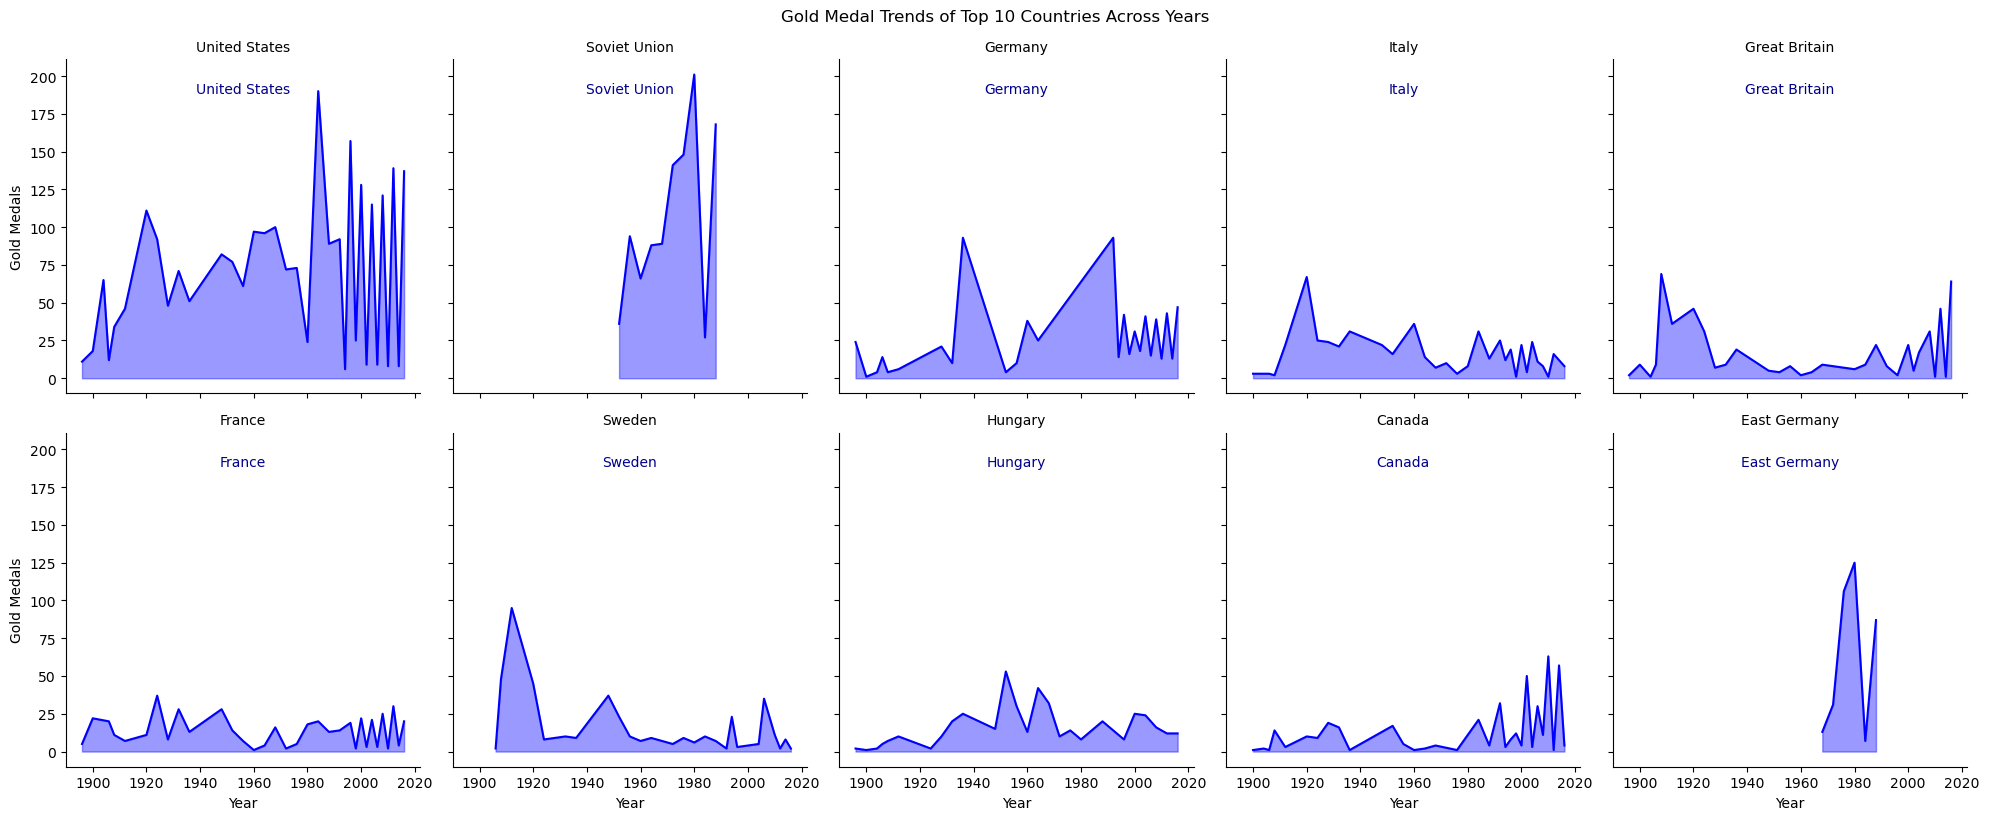

In [46]:
# Filter for gold medals only
gold_medals = df[df['Medal'] == 'Gold']

# Aggregate total gold medals by country and year
gold_trends_yearly = (
    gold_medals.groupby(['Team', 'Year'])
    .size()
    .reset_index(name='Gold_Medals')
)

# Find the top 10 countries with the most gold medals
top_countries = (
    gold_medals.groupby('Team')
    .size()
    .nlargest(10)
    .sort_values(ascending=False)
    .index
)

# Filter data for the top 10 countries
gold_trends_top_yearly = gold_trends_yearly[gold_trends_yearly['Team'].isin(top_countries)]

# Sort the data by total gold medals (descending order)
gold_trends_top_yearly['Team'] = pd.Categorical(
    gold_trends_top_yearly['Team'], 
    categories=top_countries, 
    ordered=True
)

# Plotting using Seaborn's FacetGrid with area chart
palette = sns.color_palette("tab10", len(top_countries))  # Different colors for each country

# Define a plotting function for area charts
def area_chart(data, **kwargs):
    sns.lineplot(data=data, x="Year", y="Gold_Medals", **kwargs)
    plt.fill_between(
        data['Year'], 
        data['Gold_Medals'], 
        color=kwargs.get('color', 'b'), 
        alpha=0.4
    )

g = sns.FacetGrid(
    gold_trends_top_yearly, 
    col="Team", 
    col_wrap=5, 
    height=4, 
    sharey=True, 
    sharex=True
)
g.map_dataframe(area_chart, color="b")

# Customize the layout
g.set_axis_labels("Year", "Gold Medals")
g.set_titles("{col_name}")
g.fig.suptitle("Gold Medal Trends of Top 10 Countries Across Years", y=1.02)

# Add descending order annotation
for ax, team in zip(g.axes.flat, top_countries):
    ax.annotate(
        f"{team}", 
        xy=(0.5, 0.9), 
        xycoords='axes fraction', 
        ha='center', 
        fontsize=10, 
        color="darkblue"
    )

# Display the plot
plt.show()

# Save plot as png
plt.savefig(r'C:\Users\arsal\OneDrive\Desktop\top_countries.png')

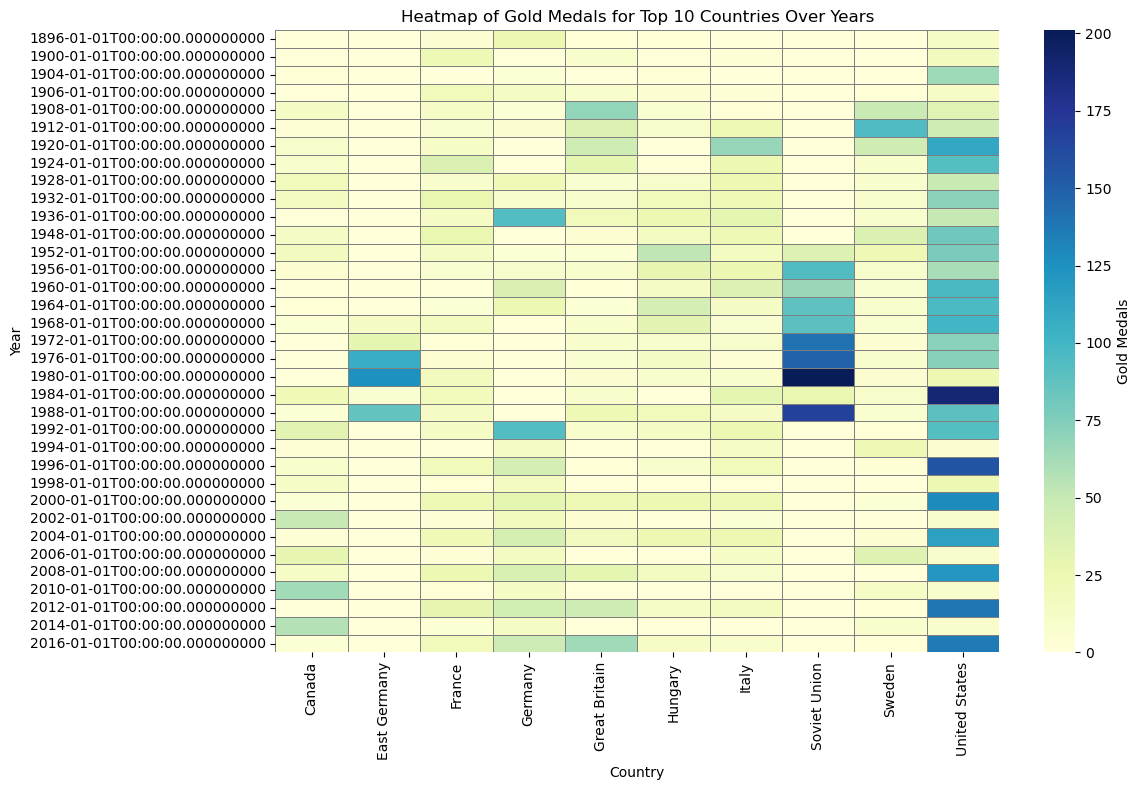

In [49]:
# Aggregate data by year and country for the top 10
gold_yearly_top = gold_trends_yearly[gold_trends_yearly['Team'].isin(top_countries)]

# Pivot data to create a matrix of Year x Team
gold_pivot = gold_yearly_top.pivot_table(
    index='Year', 
    columns='Team', 
    values='Gold_Medals', 
    aggfunc='sum', 
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    gold_pivot, 
    cmap="YlGnBu", 
    linewidths=0.5, 
    linecolor='gray', 
    annot=False, 
    cbar_kws={'label': 'Gold Medals'}
)

# Add labels and title
plt.title("Heatmap of Gold Medals for Top 10 Countries Over Years")
plt.xlabel("Country")
plt.ylabel("Year")
plt.tight_layout()

# Show the plot
plt.show()

# Save plot as png 
plt.savefig(r'C:\Users\arsal\OneDrive\Desktop\heatmap_countries.png')

### Data Export

# exporting cleaned csv
df.to_csv('Cleaned_df.csv', index=False)

#### link to visualizations
https://github.com/Prasema/Business_Analytics_Group_Report

#### link to cleaned df
https://drive.google.com/file/d/1e1B5OdDiX29P399eUVUr8T27uP4DtdTH/view?usp=sharing

## Conclusion

The analysis and visualization of the Olympic dataset provided valuable insights into the performance of athletes and countries over the years. Through data wrangling, cleaning, and in-depth analysis, we were able to:

1. **Identify the trends** in gold medal achievements of the top 10 countries across time, showcasing their evolution and dominance in Olympic history.
2. **Understand the demographics** of Olympic athletes by analyzing their average ages across various events.
3. **Recognize the standout athletes** in each sport by identifying those with the most medals.

The visualizations, including the area chart and heatmap, effectively conveyed these trends, making it easier to interpret the results and gain a deeper understanding of Olympic success patterns.

This project demonstrated how data cleaning, wrangling, analysis, and visualization techniques can help us uncover significant patterns and insights from large datasets, offering a clear view of historical trends and athlete performances across different Olympic Games.
